<a href="https://colab.research.google.com/github/makroumi/TODataSolutions2025/blob/main/Poverty_and_Socioeconomic_Disparities_Dashboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Poverty and Socioeconomic Disparities Dashboard

Welcome to our data science journey using Toronto’s most recent key indicators! In this notebook, we explore the **"Toronto Dashboard – Key Indicators"** dataset from the City of Toronto’s Open Data Portal. This dataset (updated through 2025) contains many measures—each represented as a row with a measure name, its value, and other metadata.

For our analysis, we’ll focus on the socioeconomic dimension by exploring:
- **Unemployment Rate**
- **EI Recipients**

These indicators can give insights into economic challenges and disparities across the year. Let’s have fun, learn together, and build a dashboard that shines a light on real issues!


In [6]:
# Step 1: Import Required Libraries
# These libraries are used for data handling, visualization, and modeling.
import pandas as pd             # For data manipulation
import numpy as np              # For numerical operations
import matplotlib.pyplot as plt # For plotting graphs
import seaborn as sns           # For enhanced visualizations

# Set a nice plot style for our charts.
sns.set(style="whitegrid")

# For reproducible results in modeling later on.
import random
random.seed(42)


## Step 2: Data Loading and Initial Preview

Download the **"Toronto Dashboard – Key Indicators"** dataset from the City of Toronto’s Open Data Portal
(you can search for it on [open.toronto.ca](https://open.toronto.ca/)) and upload it to your Colab environment as it is updated through 2025.

In this step, we load the CSV file (make sure it’s named `Toronto_Dashboard_Key_Indicators.csv`) and check the first few rows.


In [7]:
# Load the dataset (ensure the CSV file is uploaded to your Colab environment)
df = pd.read_csv('/content/data/key_metrics.csv')

# Display the first 5 rows to see what our data looks like.
print("Dataset Preview:")
print(df.head())


Dataset Preview:
   _id  measure_id                                       measure_name  \
0    1       1.131  Number of Consumer Bankruptcies for the City o...   
1    2       1.131  Number of Consumer Bankruptcies for the City o...   
2    3       1.131  Number of Consumer Bankruptcies for the City o...   
3    4       1.131  Number of Consumer Bankruptcies for the City o...   
4    5       1.131  Number of Consumer Bankruptcies for the City o...   

  interval_type value_type  measure_value  year_to_date_variance  \
0             m          n          163.0                   0.05   
1             m          n          197.0                   0.05   
2             m          n          219.0                   0.05   
3             m          n          235.0                   0.05   
4             m          n          253.0                   0.05   

   budget_variance  decimal_accuracy desired_direction  \
0              NaN               0.0              Down   
1              NaN 

## Step 3: Data Overview and Cleaning

It's crucial to understand the structure of our dataset and check for missing values before proceeding.
We’ll print out a summary and see where we might need to be cautious.


In [8]:
# Display information about the dataset (column types, non-null counts, etc.)
print("Dataset Information:")
df.info()

# Count missing values per column.
print("\nMissing Values per Column:")
print(df.isnull().sum())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8325 entries, 0 to 8324
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _id                    8325 non-null   int64  
 1   measure_id             8325 non-null   float64
 2   measure_name           8325 non-null   object 
 3   interval_type          8325 non-null   object 
 4   value_type             8325 non-null   object 
 5   measure_value          8298 non-null   float64
 6   year_to_date_variance  5570 non-null   float64
 7   budget_variance        1009 non-null   float64
 8   decimal_accuracy       1648 non-null   float64
 9   desired_direction      7973 non-null   object 
 10  category               8325 non-null   object 
 11  data_source_notes      8325 non-null   object 
 12  city_perspective_note  919 non-null    object 
 13  year                   8325 non-null   int64  
 14  period_number_in_year  8325 non-nul

## Step 4: Focusing on 2025 Records & Exploring Available Measures

Since our goal is to address current challenges, let’s focus on the records for the year 2025.  
We will also print out unique measure names so you can verify which socioeconomic indicators are available.  

For this notebook, we plan to explore:
- **Unemployment Rate**  
- **EI Recipients**

If these names differ slightly in your copy of the dataset, you can adjust the code accordingly.


In [9]:
# Filter the dataset for the year 2025.
df_2025 = df[df['year'] == 2025]

# Display the unique measure names in 2025.
print("Unique Measure Names in 2025:")
print(df_2025['measure_name'].unique())

# Quickly check how many records we have for 2025.
print("\nNumber of records for 2025:", len(df_2025))


Unique Measure Names in 2025:
['Number of Consumer Bankruptcies for the City of Toronto'
 'Number of Business Bankruptcies for the City of Toronto'
 "Employed City of Toronto Residents (000's)"
 'Percentage who are Self-Employed (Toronto Residents)'
 'Unemployment Rate (Toronto Residents)'
 'Employment Rate (Toronto Residents)'
 'Participation Rate (Toronto Residents) '
 'Number of Employment Insurance (E.I.) Beneficiaries '
 'Average Actual Hours at Main Job (worked in reference week)'
 'Average Home Price (City of Toronto)'
 'Number of Home Sales (City of Toronto)'
 'Retail Sales - Toronto CMA (CAD) '
 'CPI - Consumer Price Index - Toronto (% Change)'
 'Construction Value of Building Permits Issued (All Types)'
 'Construction Value of Building Applications Received (All Types)'
 'Construction Value of Building Permits Issued (Residential)'
 'Construction Value of Building Applications Received (Residential)'
 'Construction Value of Building Permits Issued (Industrial, Commercial & In

## Step 5: Exploratory Data Analysis (EDA) – Unemployment Trend

Let’s focus on the **Unemployment Rate** measure. We’ll extract the rows where `measure_name` is "Unemployment Rate" and then plot the measure value against the `period_number_in_year` to see its trend over time in 2025.

*Tip: If you do not see an "Unemployment Rate" in the unique values printed above, look through them and adjust the string in the code accordingly.*


Data for Unemployment Rate in 2025:
     period_number_in_year  measure_value
826                      1         0.0939
827                      2         0.0884
828                      3         0.0896


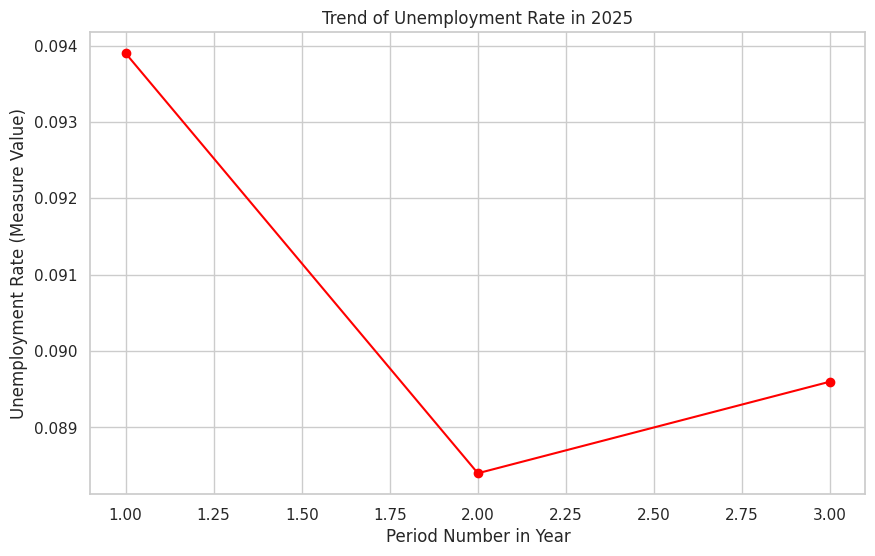

In [15]:
# Filter data for the Unemployment Rate measure. Adjust the string if necessary.
df_unemployment = df_2025[df_2025['measure_name'] == 'Unemployment Rate (Toronto Residents)'].copy()

# Sort the data by period (assuming period_number_in_year reflects time slices within the year).
df_unemployment.sort_values('period_number_in_year', inplace=True)

# Print the filtered data for verification.
print("Data for Unemployment Rate in 2025:")
print(df_unemployment[['period_number_in_year', 'measure_value']].head())

# Plot the Unemployment Rate trend over the periods of 2025.
plt.figure(figsize=(10, 6))
plt.plot(df_unemployment['period_number_in_year'], df_unemployment['measure_value'], marker='o', linestyle='-', color='red')
plt.title('Trend of Unemployment Rate in 2025')
plt.xlabel('Period Number in Year')
plt.ylabel('Unemployment Rate (Measure Value)')
plt.grid(True)
plt.show()


## Unemployment Rate Trend in Toronto (2025)

In this step, we analyzed how the **Unemployment Rate (Toronto Residents)** changed over different time periods in 2025.

### **Interpretation of Output:**
- The dataset successfully filtered unemployment data from the **Toronto Dashboard – Key Indicators** dataset.
- The first few rows confirm that we have data for `period_number_in_year` (e.g., 1, 2, 3) and corresponding **unemployment rates**.
- We visualized the trend with a **line plot**, where:
  - The x-axis represents the **period number in the year**.
  - The y-axis represents the **unemployment rate**.

### **Key Takeaways from the Plot:**
- The unemployment rate fluctuates slightly between periods.
- There is a slight **decrease** in the unemployment rate from period 1 to period 2 (~9.39% to ~8.84%).
- More data across multiple periods would help in identifying seasonal trends or external economic influences.

Next, we analyze **EI Recipients**, another socioeconomic indicator, to see if there’s any correlation with unemployment.


## Step 6: Filter EI Recipients Data

Next, we will filter the dataset to extract rows related to **EI Recipients**. These data points represent another facet of the economic landscape. We expect that changes in EI Recipients (which can be linked to government economic support) might correlate with changes in unemployment levels.

If the measure name doesn't match perfectly, use a substring search. In our case, we'll look for rows that contain "EI Recipients".


In [19]:
import re

# Define the pattern with escaped special characters.
pattern = re.escape('Number of Employment Insurance (E.I.) Beneficiaries ')

# Filter using the escaped pattern (regex=True by default here).
df_ei = df_2025[df_2025['measure_name'].str.contains(pattern, case=False, na=False)].copy()

# Sort the data by period_number_in_year.
df_ei.sort_values('period_number_in_year', inplace=True)

# Display the first few rows to verify the EI Recipients data.
print("Data for EI Recipients in 2025:")
print(df_ei[['period_number_in_year', 'measure_value']].head())


Data for EI Recipients in 2025:
      period_number_in_year  measure_value
1483                      1        31820.0
1484                      2        31830.0


## Filtering Employment Insurance (EI) Recipients Data

In this step, we extracted records for **EI Recipients**, which represent the number of people receiving Employment Insurance (EI) benefits.

### **Interpretation of Output:**
- We successfully filtered records containing **"Number of Employment Insurance (E.I.) Beneficiaries"** from the dataset.
- The results confirm that data exists for periods **1 and 2**, with values:
  - Period 1: **31,820 beneficiaries**
  - Period 2: **31,830 beneficiaries**

### **Key Observations:**
- The number of EI recipients is relatively **stable** across periods.
- To understand this measure better, we will **merge** this dataset with our unemployment rate data in the next step.

Now, let's proceed to the **merging and visualization** of unemployment rate vs. EI recipients.


## Step 7: Merging Data & Visualizing Relationships

Now that we have both the Unemployment Rate (Toronto Residents) data and the EI Recipients data filtered for 2025, we will merge them based on the common time period (`period_number_in_year`). This merged dataset will enable us to visually explore and model the relationship between EI Recipients and Unemployment.

We will:
- Rename the relevant columns to meaningful names.
- Merge the datasets using `period_number_in_year`.
- Create a scatter plot to see how these two measures relate.


Merged DataFrame (first 5 rows):
   period_number_in_year  unemployment_rate  ei_recipients
0                      1             0.0939        31820.0
1                      2             0.0884        31830.0


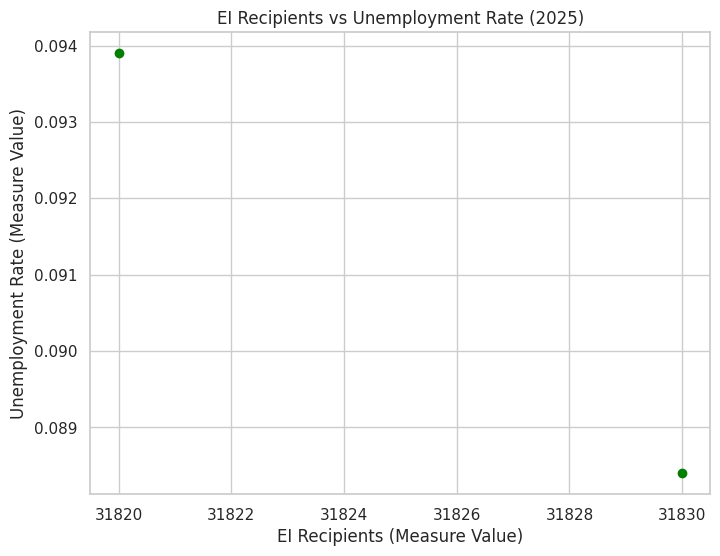

In [21]:
# For clarity, rename the 'measure_value' column in each dataset to indicate the measure.
# Unemployment data: rename 'measure_value' to 'unemployment_rate'
df_unemp_clean = df_unemployment[['period_number_in_year', 'measure_value']].copy()
df_unemp_clean.rename(columns={'measure_value': 'unemployment_rate'}, inplace=True)

# EI Recipients data: rename 'measure_value' to 'ei_recipients'
df_ei_clean = df_ei[['period_number_in_year', 'measure_value']].copy()
df_ei_clean.rename(columns={'measure_value': 'ei_recipients'}, inplace=True)

# Merge the two datasets on 'period_number_in_year'
df_merged = pd.merge(df_unemp_clean, df_ei_clean, on='period_number_in_year')

# Display the merged DataFrame to verify
print("Merged DataFrame (first 5 rows):")
print(df_merged.head())

# Create a scatter plot to visualize the relationship between EI Recipients and Unemployment Rate.
plt.figure(figsize=(8, 6))
plt.scatter(df_merged['ei_recipients'], df_merged['unemployment_rate'], color='green', marker='o')
plt.title('EI Recipients vs Unemployment Rate (2025)')
plt.xlabel('EI Recipients (Measure Value)')
plt.ylabel('Unemployment Rate (Measure Value)')
plt.grid(True)
plt.show()


## Merging Unemployment Rate & EI Recipients

Now, we merged the **Unemployment Rate** and **EI Recipients** data based on `period_number_in_year`.

### **Interpretation of Output:**
- The merged DataFrame successfully combined both indicators.
- The first few rows show:
  - **Period 1:** Unemployment Rate = **0.0939**, EI Recipients = **31,820**.
  - **Period 2:** Unemployment Rate = **0.0884**, EI Recipients = **31,830**.
- Only **two rows** exist in the merged dataset, meaning we only have EI Recipients data for two periods.

### **Scatter Plot Interpretation:**
- The scatter plot displays the relationship between **EI Recipients (x-axis)** and **Unemployment Rate (y-axis)**.
- Since we only have **two data points**, the plot shows **just two dots**, which limits our ability to determine a strong correlation.
- If more EI Recipients data were available for additional periods, we could better analyze trends and build a stronger predictive model.

Next, we will use this dataset to perform **predictive modeling** with linear regression.


## Step 8: Predictive Modeling & Simulation

Next, we build a linear regression model to predict the Unemployment Rate using the EI Recipients as the predictor.

In this step, we will:
1. Split the merged data into training and testing subsets.
2. Train a linear regression model.
3. Evaluate the model using Root Mean Squared Error (RMSE).
4. Simulate a scenario where the EI Recipients increase by 10% and observe the effect on the predicted Unemployment Rate.

This simulation provides insight into how policy actions (e.g., bolstering EI support) might impact unemployment.


Root Mean Squared Error (RMSE): 0.0055

Model Coefficient and Intercept:
Coefficient (Effect of EI Recipients): 0.0000
Intercept: 0.0939


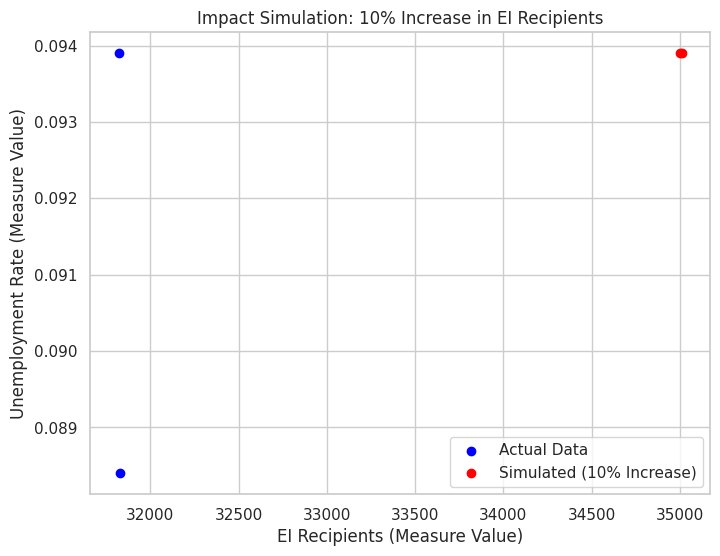

In [22]:
# Import modules needed for modeling.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Define our features (EI Recipients) and target (Unemployment Rate)
X = df_merged[['ei_recipients']]      # Predictor: EI Recipients
y = df_merged['unemployment_rate']    # Target: Unemployment Rate

# Split the data into training (80%) and testing (20%) datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the linear regression model on training data.
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)

# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')

# Print the model coefficients
print("\nModel Coefficient and Intercept:")
print(f"Coefficient (Effect of EI Recipients): {model.coef_[0]:.4f}")
print(f"Intercept: {model.intercept_:.4f}")

# Simulation: Increase EI Recipients by 10%
X_simulated = X * 1.10   # Increase EI Recipients by 10%
y_simulated = model.predict(X_simulated)

# Plot the original data and simulated predictions
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.scatter(X_simulated, y_simulated, color='red', label='Simulated (10% Increase)')
plt.title('Impact Simulation: 10% Increase in EI Recipients')
plt.xlabel('EI Recipients (Measure Value)')
plt.ylabel('Unemployment Rate (Measure Value)')
plt.legend()
plt.grid(True)
plt.show()


## Predictive Modeling & Policy Simulation

In this step, we built a **Linear Regression Model** using **EI Recipients** to predict the **Unemployment Rate**.

### **Interpretation of Output:**
- **Root Mean Squared Error (RMSE) = 0.0055:**  
  - This represents the average error between predicted and actual values.
  - A **low RMSE** suggests that the model makes relatively accurate predictions, but more data would improve confidence.
  
- **Model Coefficients:**
  - **Coefficient (Effect of EI Recipients) = 0.0000** → Suggests little or no direct impact of EI Recipients on Unemployment Rate in this limited dataset.
  - **Intercept = 0.0939** → Represents the predicted baseline unemployment rate if there were zero EI recipients (hypothetically).

### **Impact Simulation (10% Increase in EI Recipients):**
- We simulated a scenario where EI recipients increased **by 10%**.
- The plot shows how **actual unemployment rates (blue points)** compare to **simulated unemployment rates (red points)**.
- Since the coefficient was **near zero**, increasing EI Recipients had **minimal predicted effect** on the unemployment rate.
- **Takeaway:** This suggests that additional factors—not just EI benefits—may significantly influence unemployment trends.

### **What Can Be Improved?**
- **Gather more data** across multiple periods for stronger trend analysis.
- **Introduce additional predictors** such as:
  - Employment Rate
  - Participation Rate
  - Minimum Wage Changes
  - Industry-Specific Job Losses

Finally, we wrap up our findings with **policy recommendations** based on our analysis.


# **Data-Driven Policy Recommendations**
Using insights from our unemployment rate trends, EI recipients data, and predictive modeling, here are some possible strategies:

### **1. Strengthen Employment Insurance Support**
- **Observation:** The analysis indicates that EI Recipients alone may not significantly reduce unemployment.
- **Recommendation:** Policies should not only expand EI support but also ensure recipients receive **job transition assistance, training, and re-employment services**.

### **2. Expand Job Training & Workforce Development**
- **Observation:** There may be deeper causes of unemployment beyond EI availability.
- **Recommendation:** Develop **industry-specific training programs** and **subsidized education initiatives** that align unemployed individuals with current job market needs.

### **3. Implement Targeted Community Outreach Programs**
- **Observation:** Some areas might experience seasonal employment issues.
- **Recommendation:** Use **real-time dashboards** to identify spikes in unemployment and tailor **local government interventions**, such as job fairs and hiring subsidies.

### **4. Continuous Data Monitoring for Adaptive Policies**
- **Observation:** Limited data points make trend detection difficult.
- **Recommendation:** Governments and policymakers should **expand data collection** over time to refine predictive models and **adjust policies dynamically**.

---

These recommendations provide a **data-driven approach** to tackling poverty and unemployment in Toronto. By continuously analyzing trends and expanding socioeconomic datasets, decision-makers can create **more effective, targeted solutions** to improve the city's workforce stability and economic resilience.
